In [ ]:
# For each image, generate 3 masked images:
#   - Vertical bars
#   - Crossing bars
#   - Diagonal fences

# Write:
#   - main (read and save files)
#   - vmask
#   - cmask
#   - dmask

In [46]:
# Import modules
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image 
import os

(405, 720, 3)


  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

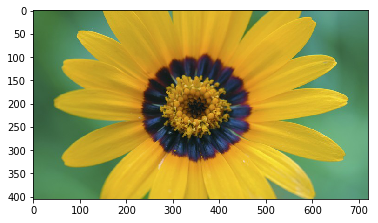

In [25]:
im = plt.imread('/Users/yizizhang/Desktop/foxlabmaskrcnn/flower.jpg')

plt.imshow(im)
print(im.shape)

im.setflags(write=1)
im.flags

In [3]:
# from PIL import Image 
#  
# def main(): 
#     try: 
#          #Relative Path 
#         img = Image.open("../monkeypictures/*.png")  
#         original_name = img.filename  
#         #Saved in the same relative location 
#         img.save("cross_bars_" + original_name)  
#     except IOError: 
#         pass
#  
# if __name__ == "__main__": 
#     main()

In [204]:
x = list(range(0, im.shape[0]))
for i in x:
    x[i] = x[i] / 8

y = list(range(0, im.shape[1]))
for i in y:
    y[i] = y[i] / 8

In [205]:
def Vmask(im, y):
    vmask = im.copy()
    vmask[:, np.sin(y)<0,:] = 0
    return vmask


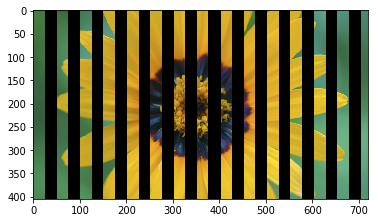

In [206]:
vmask = Vmask(im, y)
plt.imshow(vmask)

In [207]:
def Cmask(im, x, y):
    vmask = im.copy()
    vmask[:,np.sin(y)<0,:] = 0
    
    cmask = vmask.copy()
    cmask[np.sin(x)<0, :, :] = 0
    return cmask

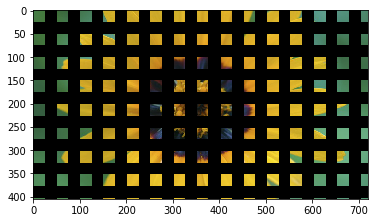

In [208]:
cmask = Cmask(im, x, y)
plt.imshow(cmask)

In [37]:
def Dmask(im, x, y):
    dmask = im.copy()
    for i in x:
        for j in y:
            if np.sin((i+j)/10) < -.7:
                dmask[i,j,:] = 0
            if np.sin((i-j)/10) < -.7:
                dmask[i,j,:] = 0
    
    return dmask

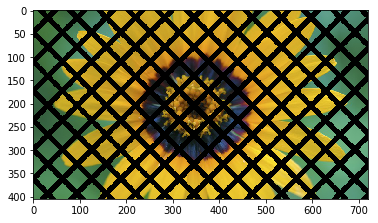

In [38]:
dmask = Dmask(im, x, y)
plt.imshow(dmask)

In [216]:

def main():
    try: 
        img_path = '/Users/yizizhang/Desktop/foxlabmaskrcnn/flower.jpg'
        img = plt.imread(img_path)

        x = list(range(0, im.shape[0]))
        for i in x:
            x[i] = x[i] / 8

        y = list(range(0, im.shape[1]))
        for i in y:
            y[i] = y[i] / 8
            
        vmask = Vmask(img, y)
        cmask = Cmask(img, x, y)
        
        x = list(range(0, im.shape[0]))
        y = list(range(0, im.shape[1]))
        dmask = Dmask(img, x, y)
        #plt.imshow(dmask)
        
        base = os.path.basename(img_path) 
        path = os.path.dirname(img_path) 
        
        plt.imsave("vert_bars_" + base, vmask)
        plt.imsave("cross_bars_" + base, cmask)
        plt.imsave("diag_bars_" + base, dmask)
        
    except IOError: 
        pass
    

In [217]:
main()